In [ ]:
# Importing required modules

import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Loading the mnist dataset
images = mnist.load_data()
images

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# Splitting the dataset for training and testing
(train_img, train_label), (test_img, test_label) = images

# Normalize pixel values between 0 and 1
train_img, test_img = train_img / 255.0, test_img / 255.0
print(train_img.shape)

# Reshaping image into the readable shape
train_img = train_img.reshape(-1, 28, 28, 1)
test_img = test_img.reshape(-1, 28, 28, 1)

(60000, 28, 28)


In [ ]:
# Defining the CNN architecture using relu activation function as we want to avoid negative values
model = models.Sequential()

# Adding a convolution layer with 50 filters each of dimension 3x3
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Using max pooling with kernel dimensions 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Adding a convolution layer with 100 filters each of dimension 3x3
model.add(layers.Conv2D(100, (3, 3), activation='relu'))

# Using max pooling with kernel dimensions 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Adding a convolution layer with 100 filters each of dimension 3x3
model.add(layers.Conv2D(100, (3, 3), activation='relu'))

# Flattening the data to one dimension
model.add(layers.Flatten())

# Adding a dense layer with 100 nodes which has high interconnection of nodes
model.add(layers.Dense(100, activation='relu'))

# Defining the output layer
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 100)       45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 100)         90100     
                                                                 
 flatten (Flatten)           (None, 900)               0

In [ ]:
# Training the model using the adam optimizer
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

# Fitting the data into the model
history = model.fit(train_img, train_label, epochs = 15, validation_data=(test_img, test_label))

Epoch 1/15
1875/1875 [==============================] - 125s 66ms/step - loss: 0.1198 - accuracy: 0.9628 - val_loss: 0.0447 - val_accuracy: 0.9849
Epoch 2/15
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0304 - val_accuracy: 0.9897
Epoch 3/15
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0512 - val_accuracy: 0.9839
Epoch 4/15
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 5/15
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0295 - val_accuracy: 0.9921
Epoch 6/15
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0309 - val_accuracy: 0.9915
Epoch 7/15
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0

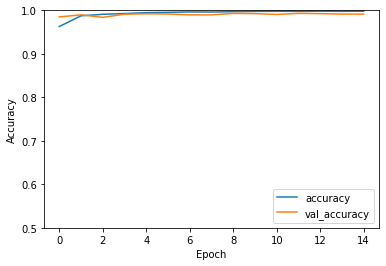

In [ ]:
# Testing and Evaluating 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
print("accuracy =" , history.history['accuracy'][1])

accuracy = 0.9875166416168213


313/313 [==============================] - 6s 19ms/step
Final test set loss: 0.047244
Final test set accuracy: 0.991300


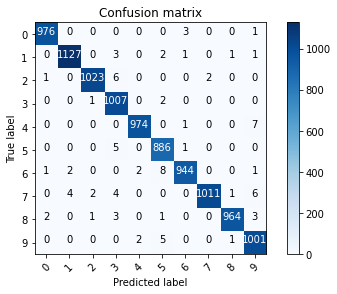

In [ ]:
# Calculating model accuracy using testing dataset
results = model.evaluate(test_img, test_label)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

predictions = model.predict(test_img)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Making the confusion matrix
confusion_mtx = confusion_matrix(test_label, np.argmax(predictions, axis = 1)) 
# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))